In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcls
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
from pyhdf.SD import SD, SDC
import os

In [2]:
time = "20100918"
dtype = 'test_data'

In [3]:
# 設置文件夾保存圖像
output_folder = "trmm_images"
os.makedirs(output_folder, exist_ok=True)

In [4]:
hdf  = SD(f'{dtype}/3B42.{time}.06.7A.HDF', SDC.READ)
datasets = hdf.datasets()

pr = hdf.select('precipitation')[:]
hq = hdf.select('HQprecipitation')[:]
ir = hdf.select('IRprecipitation')[:]

In [7]:
def PLOT_MAP(var, var_name):
    fig, ax   = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': data_proj}, figsize=(5,6))
    CS = ax.contourf(lon-lon_cnt, lat, var.T, transform=data_proj, extend='max', cmap=cmap, levels=bounds)
    ax.coastlines(linewidth=0.6)
    ax.set_extent(extent, crs=data_proj)

    gl  = ax.gridlines(linewidth=0.5, color='gray', alpha=0.5, linestyle='--', draw_labels=True)
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    gl.top_labels   = False
    gl.right_labels = False
    cbar_ax = fig.add_axes([0.94, 0.32, 0.025, 0.3])   # [left, bottom, width, height]
    cbar    = fig.colorbar(CS, cax=cbar_ax, orientation='vertical', extend='max')
    cbar.ax.tick_params(labelsize=12)
    cbar.ax.set_title('[mm/hr]', fontsize=10)
    ax.set_title(f'TRMM 3B42 2010-09-18 {var_name}', fontsize=12)
    plt.savefig(output_folder+f'TRMM_20100918_{var_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

dl = 0.25
lon = np.arange(-180, 180, dl)+dl/2
lat = np.arange(-50, 50, dl)+dl/2

lon_cnt   = 180
extent    = [80-lon_cnt , 210-lon_cnt, -80, 80]
data_proj = ccrs.PlateCarree(central_longitude=lon_cnt)
bounds    = np.arange(0, 18.01, 3)
cmap      = cm.jet

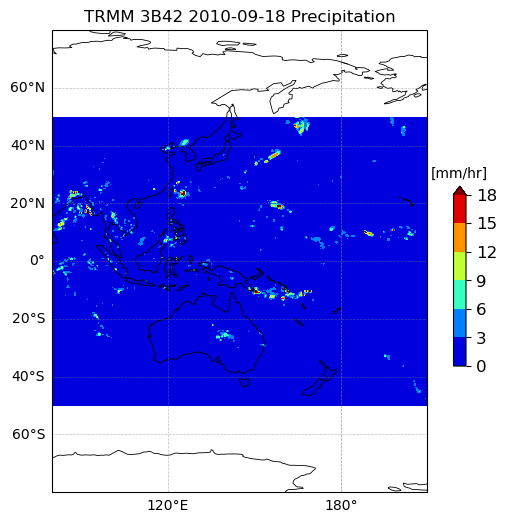

In [8]:
PLOT_MAP(pr, 'Precipitation')

### handson6-2A

In [9]:
### HW5-2A

hdf  = SD(f'{dtype}/2A25.{time}.73151.7.HDF', SDC.READ)
datasets = hdf.datasets()

nfr = hdf.select('nearSurfRain')[:]
nfr_02 = np.where(nfr<=0.2, np.nan, nfr)

HDF4Error: SD: no such file

In [ ]:
### Plotting HW5-2A
def PLOT_MAP(var, var_name):
    fig, ax   = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': data_proj}, figsize=(6,6))
    CS = ax.contourf(lon-lon_cnt, lat, var, transform=data_proj, extend='max', cmap=cmap, levels=bounds)
    ax.coastlines(linewidth=0.6)
    ax.set_extent(extent, crs=data_proj)
    gl  = ax.gridlines(linewidth=0.5, color='gray', alpha=0.5, linestyle='--', draw_labels=True)
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    gl.top_labels   = False
    gl.right_labels = False
    cbar_ax = fig.add_axes([0.94, 0.32, 0.025, 0.3])   # [left, bottom, width, height]
    cbar    = fig.colorbar(CS, cax=cbar_ax, orientation='vertical', extend='max')
    cbar.ax.tick_params(labelsize=10)
    cbar.ax.set_title('[mm/hr]', fontsize=10)
    ax.set_title(f'TRMM 3B42 2010-09-18 {var_name}', fontsize=12)
    plt.savefig(figdir+f'TRMM_20100918_{var_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
lon    = hdf.select('Longitude')[:]
lat    = hdf.select('Latitude')[:]

lon_cnt   = 180
extent    = [118-lon_cnt, 132-lon_cnt, 16, 30]
data_proj = ccrs.PlateCarree(central_longitude=lon_cnt)
bounds    = np.arange(0, 30.01, 5)
cmap      = cm.jet

PLOT_MAP(nfr_02, 'Near Surface Rain (>0.2)')

### handson 6-2B

In [ ]:
time = "20100918"

In [ ]:
### Reading HW5-2B
hdf  = SD(f'{dtype}/2A12.{time}.73151.7.HDF', SDC.READ)
datasets = hdf.datasets()
qf = hdf.select('qualityFlag')[:]
sp = hdf.select('surfacePrecipitation')[:]
sp_01 = np.where(sp<=0.1, np.nan, sp)
sp_01 = np.where(qf!=0, np.nan, sp_01)

In [ ]:
### Plotting HW5-2A
def PLOT_MAP(var, var_name):
    fig, ax   = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': data_proj}, figsize=(6,6))
    CS = ax.contourf(lon-lon_cnt, lat, var, transform=data_proj, extend='max', cmap=cmap, levels=bounds)
    ax.coastlines(linewidth=0.6)
    ax.set_extent(extent, crs=data_proj)
    gl  = ax.gridlines(linewidth=0.5, color='gray', alpha=0.5, linestyle='--', draw_labels=True)
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    gl.top_labels   = False
    gl.right_labels = False
    cbar_ax = fig.add_axes([0.94, 0.32, 0.025, 0.3])   # [left, bottom, width, height]
    cbar    = fig.colorbar(CS, cax=cbar_ax, orientation='vertical', extend='max')
    cbar.ax.tick_params(labelsize=10)
    cbar.ax.set_title('[mm/hr]', fontsize=10)
    ax.set_title(f'TRMM 3B42 2010-09-18 {var_name}', fontsize=12)
    plt.savefig(figdir+f'TRMM_20100918_{var_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
lon    = hdf.select('Longitude')[:]
lat    = hdf.select('Latitude')[:]

lon_cnt   = 180
extent    = [118-lon_cnt, 132-lon_cnt, 16, 30]
data_proj = ccrs.PlateCarree(central_longitude=lon_cnt)
bounds    = np.arange(0, 30.01, 5)
cmap      = cm.jet

PLOT_MAP(sp_01, 'Surface Precipitation (>0.1)')